In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sympy import *

init_printing()

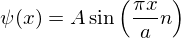

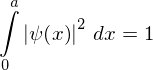

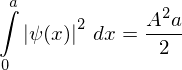

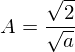

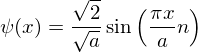

In [2]:
x, A, a, aa = symbols('x, A, a, aa', real=True, positive=True)
n = symbols('n', real=True, positive=True, integer=True)

psi = Function('psi')

def psi_(x): 
    return A * sin(n*pi*x/a)

norm_integ = integrate(psi_(x)**2, (x, 0, a))
snorm_integ = integrate(abs(psi(x))**2, (x,0,a))
Anorm = solve(norm_integ-1, A)[0]

display(relational.Eq(psi(x), psi_(x)))
display(relational.Eq(snorm_integ, 1))
display(relational.Eq(snorm_integ, norm_integ))
display(relational.Eq(A, Anorm))
display(relational.Eq(psi(x), psi_(x).subs(A, Anorm)))

def psi(x):
    return (Anorm*psi_(x)/A).subs(a,aa)


# sympy ile elde edilen özfonksiyonları
# numpy fonksiyonuna çevriliyor
psi_lambdify = lambdify((x,n,aa), psi(x), "numpy")
dpsi_lambdify = lambdify((x,n,aa), diff(psi(x), x), "numpy")

psi_np = lambda x: psi_lambdify(x, n, aa)
dpsi_np = lambda x: dpsi_lambdify(x, n, aa)

In [3]:
aa=5
print "a = ", aa
print "kuantum,  normalizasyon,  <p^2>"
for n in range(1, 10):
    print n, N(integrate(psi(x)**2, (x, 0, aa))), N(integrate(diff(psi(x))**2, (x, 0, aa)))

a =  5
kuantum,  normalizasyon,  <p^2>
1 1.00000000000000 0.394784176043574
2 1.00000000000000 1.57913670417430
3 1.00000000000000 3.55305758439217
4 1.00000000000000 6.31654681669719
5 1.00000000000000 9.86960440108936
6 1.00000000000000 14.2122303375687
7 1.00000000000000 19.3444246261351
8 1.00000000000000 25.2661872667888
9 1.00000000000000 31.9775182595295


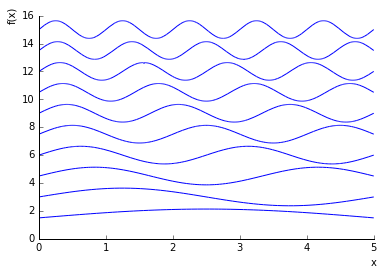

In [4]:
p = [psi(x) + 1.5*n for n in range(10, 0, -1)]
p += [(x, 0, aa)]
plot(*p)

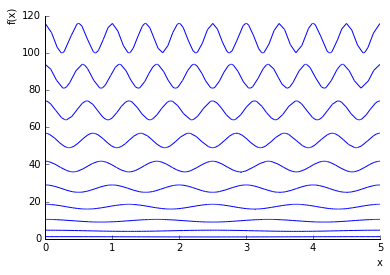

In [5]:
p = [diff(psi(x))**2 + n**2 for n in range(10, 0, -1)]
p += [(x, 0, aa)]
plot(*p)

## Aynı çizimlerin matplotlib ve numpy ile tekrarı

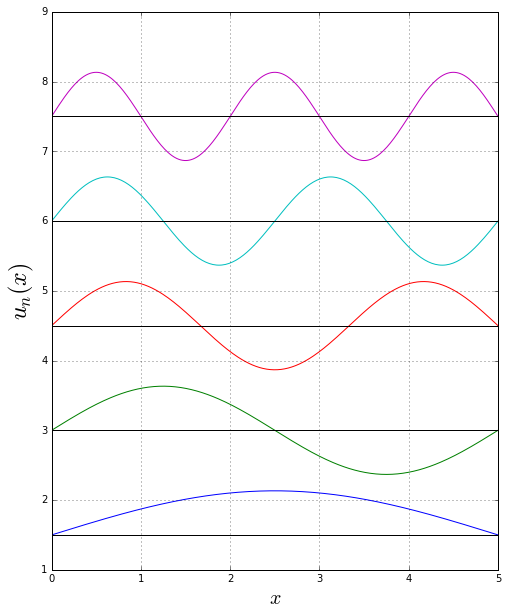

In [6]:
plt.figure(figsize=(8,10))

xm = np.linspace(0, aa, 250)
for n in range(1, 6):
    plt.plot(xm, psi_np(xm) + 1.5*n)
    plt.axhline(1.5*n, color="black")
    

plt.xlabel('$x$', fontsize=20)
plt.ylabel('$u_n(x)$', fontsize=24)
plt.grid()
plt.show()

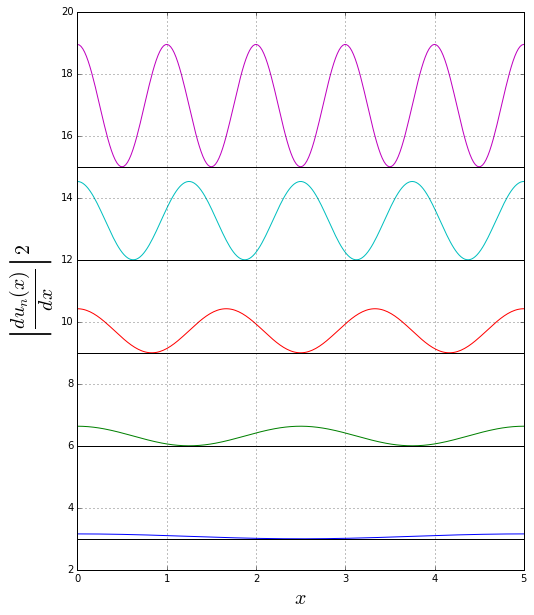

In [7]:
plt.figure(figsize=(8,10))

xm = np.linspace(0, aa, 250)
for n in range(1, 6):
    plt.plot(xm, dpsi_np(xm)**2 + 3*n)
    plt.axhline(3*n, color="black")
    

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'$\left|\frac{d u_n(x)}{dx}\right|^2$', fontsize=28)
plt.grid()
plt.show()